In [5]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
matplotlib.rcParams.update({'font.size': 14})

In [6]:
def pos_multi(observers, observer_num, num_organs=4):
    pos_list = []
    for ordx in range(num_organs):
        pos_list.append(((observer_num + 1) / (observers + 1)) + ordx)
    return pos_list

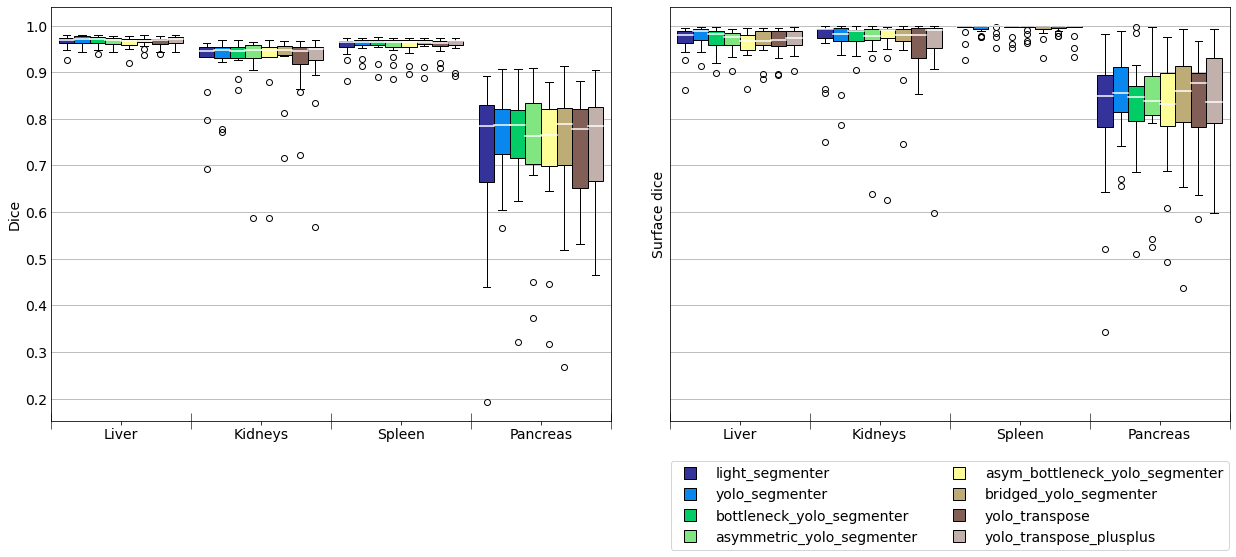

In [16]:
models = ["light_segmenter", "yolo_segmenter", "bottleneck_yolo_segmenter", "asymmetric_yolo_segmenter", "asym_bottleneck_yolo_segmenter", "bridged_yolo_segmenter","yolo_transpose" , "yolo_transpose_plusplus"]
all_res = np.full((len(models), 16, 4, 2), np.nan)

for mdx, model in enumerate(models):
    all_res[mdx] = np.load(os.path.join("/data/FLARE21/results/", model, "full_res_results_grid.npy"))[0]

fig, (ax0,ax1) = plt.subplots(ncols=2, sharey=True, figsize=(18,8))

num_models = len(models)
organs = ("Liver", "Kidneys", "Spleen", "Pancreas")
#colors = ['xkcd:bright teal', 'xkcd:vibrant green', 'xkcd:fire engine red', 'xkcd:bright yellow', 'xkcd:electric pink', 'xkcd:pumpkin']
cmap = matplotlib.cm.get_cmap('terrain')
colors = [cmap(i/num_models) for i in range(num_models)]

metric_idx = 0
# plot data
bps = []
for mdx in range(num_models):
    locals()[f'bp{mdx}'] = ax0.boxplot([all_res[mdx,:,organ_idx,metric_idx] for organ_idx in range(4)], positions=pos_multi(num_models, mdx), widths=1/(num_models+1), patch_artist=True)
    bps.append(locals()[f'bp{mdx}'])

# fill colors & median colors
for color_idx, bp in enumerate(bps):
    for patch, line in zip(bp['boxes'], bp['medians']):
        patch.set_facecolor(colors[color_idx]) 
        line.set_color('xkcd:white')
        line.set_linewidth(1.5)

# ticks and labels
ax0.set_xticks([0.5,1.5,2.5,3.5])
ax0.set_xticklabels(organs)
ax0.set_xticks(np.linspace(0,4,5), minor=True)
ax0.tick_params(which='minor', direction='inout', length=16, axis='x')
ax0.tick_params(which='both', direction='inout', length=0, axis='y')
# make some of the ticks invisible
for t in ax0.xaxis.get_ticklines():
    t.set_color((0,0,0,0))
ax0.set_ylabel('Dice')
ax0.set_xlim(0,4)
ax0.grid(which='both', axis='y')

metric_idx = 1
# plot data
bps = []
for mdx in range(num_models):
    locals()[f'bp{mdx}'] = ax1.boxplot([all_res[mdx,:,organ_idx,metric_idx] for organ_idx in range(4)], positions=pos_multi(num_models, mdx), widths=1/(num_models+1), patch_artist=True)
    bps.append(locals()[f'bp{mdx}'])

# fill colors & median colors
for color_idx, bp in enumerate(bps):
    for patch, line in zip(bp['boxes'], bp['medians']):
        patch.set_facecolor(colors[color_idx]) 
        line.set_color('xkcd:white')
        line.set_linewidth(1.5)

# ticks and labels
ax1.set_xticks([0.5,1.5,2.5,3.5])
ax1.set_xticklabels(organs)
ax1.set_xticks(np.linspace(0,4,5), minor=True)
ax1.tick_params(which='minor', direction='inout', length=16, axis='x')
ax1.tick_params(which='both', direction='inout', length=0, axis='y')
# make some of the ticks invisible
for t in ax1.xaxis.get_ticklines():
    t.set_color((0,0,0,0))
ax1.set_ylabel('Surface dice')
ax1.set_xlim(0,4)
ax1.grid(which='both', axis='y')

m_s = []
for color, label in zip(colors, models):
    m_s.append(mlines.Line2D([],[], mfc=color, mec='k', marker='s', linestyle='None', mew=1, markersize=12.5, label=label))
ax1.legend(handles=m_s, bbox_to_anchor=(0,-1,1,0.92), bbox_transform=ax1.transAxes, loc='upper center', ncol=2)
plt.subplots_adjust(left=0.101, right=0.901, top=0.981, bottom=0.204, wspace=0.2, hspace=0.122)
plt.tight_layout()
plt.show()